<a href="https://colab.research.google.com/github/szl10/Loan_prediction/blob/main/Loan_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and processing


In [7]:
df=pd.read_csv("/content/train.csv")

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.shape


(614, 13)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy="most_frequent")
df[df.select_dtypes(include=['object']).columns]=imputer.fit_transform(df.select_dtypes(include=['object']))

imputer=SimpleImputer(strategy='median')
df[df.select_dtypes(include=['number']).columns]=imputer.fit_transform(df.select_dtypes(include=['number']))


In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
#label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
#can be done using sklearns labelencoding


In [29]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [30]:
df.shape

(614, 13)

In [31]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [32]:
#replacing the value 3+ as 4
df=df.replace(to_replace='3+',value=4)

In [33]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

### Data visualisation

<Axes: xlabel='count', ylabel='Education'>

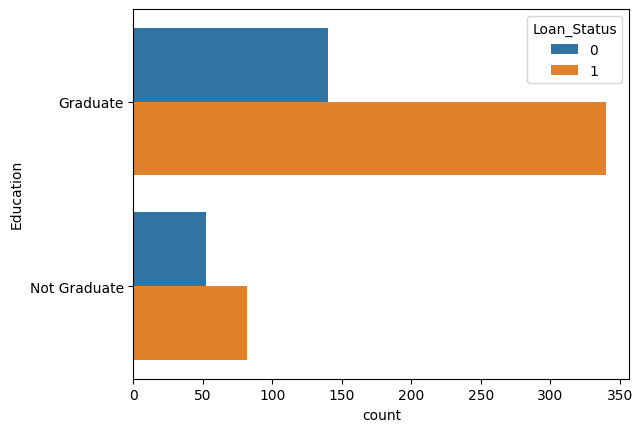

In [39]:
#education and loan
sns.countplot(y='Education', hue='Loan_Status',data=df)

<Axes: xlabel='count', ylabel='Married'>

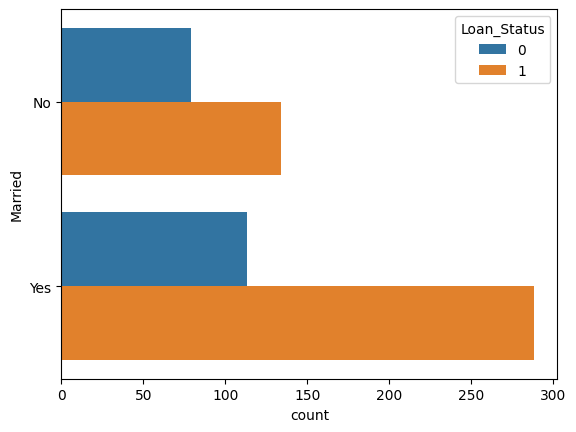

In [41]:
#married and loan status
sns.countplot(y='Married',hue='Loan_Status', data=df)

In [56]:
#convert categorical data to numerical

df.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':1, 'Female':0},
            'Education':{'Graduate':1,'Not Graduate':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Urban':2,"Rural":0,'Semiurban':1}},inplace=True)

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [64]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

### Train Test Split

In [65]:
X_train,X_test,Y_train,Y_Test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [66]:
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (491, 11) (123, 11)


## Training a model
### Support vector classifier

In [67]:
cls=svm.SVC(kernel='linear')
#training the svm model oon X_train
cls.fit(X_train,Y_train)

SVC(kernel='linear')

In [71]:
#accuracy score on training data
X_train_prediction=cls.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [72]:
print(training_data_accuracy)

0.8004073319755601


In [74]:
#accuracy on test data
X_test_prediction=cls.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_Test)

In [75]:
print(test_data_accuracy)

0.8130081300813008


SyntaxError: ignored